In [2]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
# 1. Define File Paths 
# Paths are relative to the project root directory (daily-gridded-meteo/)
NETCDF_FILE = Path("../data/raw/anusplin_pr_final.nc.nc")
SHAPEFILE = Path("../data/gis/Chittenden_catchment.shp") 

In [5]:
# 2. Load and Explore NetCDF Structure
try:
    ds = xr.open_dataset(NETCDF_FILE)
    print("--- NetCDF Dataset Structure ---")
    print(ds)
    print("\n--- Coordinates ---")
    print(list(ds.coords))
    print("\n--- Data Variables ---")
    print(list(ds.data_vars))

    precip_var = 'pr'
    
except FileNotFoundError as e:
    print(f"Error: A file was not found. Please check the path: {e}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

--- NetCDF Dataset Structure ---
<xarray.Dataset> Size: 6MB
Dimensions:  (time: 22280, lat: 6, lon: 10)
Coordinates:
  * lat      (lat) float64 48B 48.96 49.04 49.12 49.21 49.29 49.37
  * lon      (lon) float64 80B -121.5 -121.4 -121.3 ... -120.9 -120.8 -120.7
  * time     (time) datetime64[ns] 178kB 1950-01-01 1950-01-02 ... 2010-12-31
Data variables:
    pr       (time, lat, lon) float32 5MB ...
Attributes: (12/14)
    grid_resolution:  Square grid, 0.08333333 degrees_north by 0.08333333 deg...
    _nc3_strict:      1
    contact1:         Alex Cannon
    contact2:         acannon@uvic.ca
    title:            ANUSPLIN interpolated daily minimum temperature, maximu...
    CDO:              Climate Data Operators version 1.6.9 (http://mpimet.mpg...
    ...               ...
    version_comment:  141.00 to 52.00 W, 41.00 to 84.00 N
    version:          ANUSPLIN data obtained 2 April 2012, 14 June 2012, and ...
    NCO:              "4.6.0"
    input_data:       [pcp,min,max]YYY_DOY.as


Plotting a map for the first timestep using variable 'pr'...


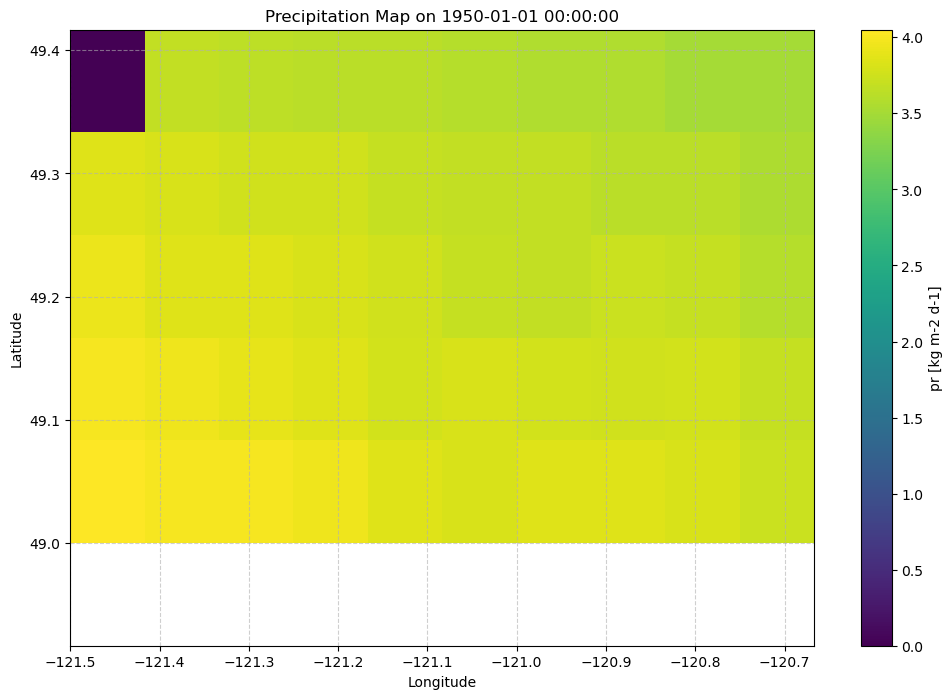

In [6]:
# 3. Initial Visualization: Map of Precipitation for a Single Timestep
print(f"\nPlotting a map for the first timestep using variable '{precip_var}'...")
# Select the first time step for plotting
precip_first_step = ds[precip_var].isel(time=0)

plt.figure(figsize=(12, 8))
precip_first_step.plot(cmap='viridis')
plt.title(f"Precipitation Map on {pd.to_datetime(precip_first_step.time.values)}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Plotting a time series for a single grid point...


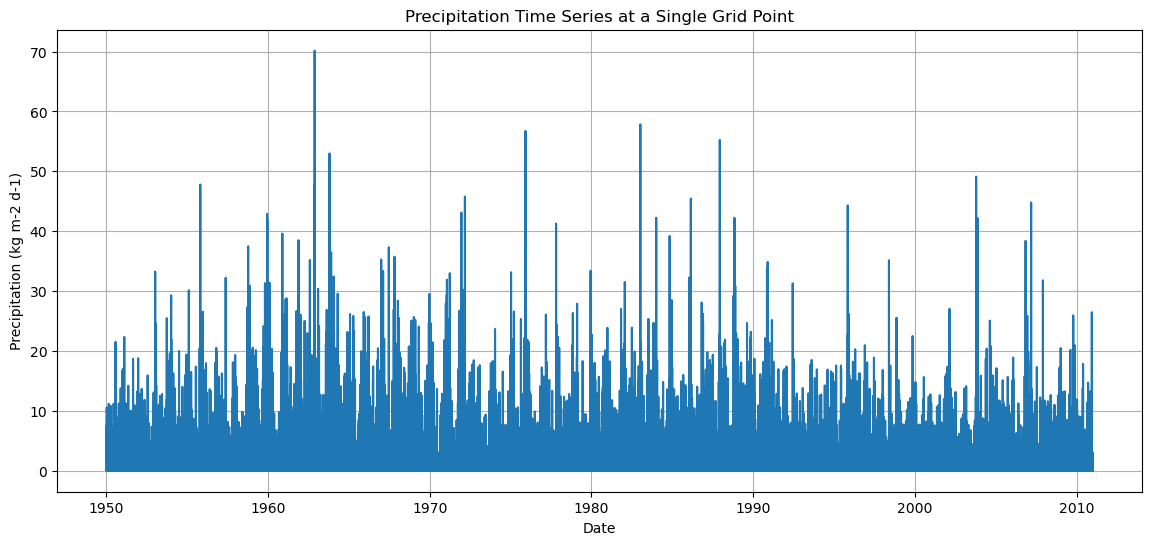

In [7]:
# 4. Initial Visualization: Time Series for a Single Point
print(f"Plotting a time series for a single grid point...")
# Select a single point using coordinates (adjust lat/lon values to be within your data)
sample_point = ds[precip_var].sel(lat=49.2, lon=-121.0, method='nearest')

plt.figure(figsize=(14, 6))
sample_point.plot()
plt.title("Precipitation Time Series at a Single Grid Point")
plt.ylabel(f"Precipitation ({ds[precip_var].attrs.get('units', 'unknown units')})")
plt.xlabel("Date")
plt.grid(True)
plt.show()